## Exploring Earnings based on College Majors

### Data Visualization Using pandas and Matplotlib

<img src="https://world.edu/wp-content/uploads/2018/06/college_majors.jpg"/>

The current project will focus on the job outcomes of students who graduated from college between 2010 and 2012. The dataset was collected by the [American Community Service](https://www.census.gov/programs-surveys/acs/), and was cleaned and [released](https://github.com/fivethirtyeight/data/tree/master/college-majors) by FiveThirtyEight. 

Each row in the dataset represents a different major in college and contains the following information:

- Rank: Rank by median earnings.
- Major_code: Major code.
- Major: Major description.
- Major_category: Category of major.
- Total: Total number of people with the major.
- Sample_size: Unweighted sample size of full-time.
- Men: Male graduates.
- Women: Female graduates.
- ShareWomen: Women as share of the total.
- Employed: Number employed.
- Unemployment_rate: Percent unemployed.
- Median: Median salary of full-time, year-round workers.
- Low_wage_jobs: Number in low-wage service jobs.
- Full_time: Number employed 35 hours or more.
- Part_time: Number employed less than 35 hours.

Many questions can be preliminarily answered using data visualizations!

Let's start by importing libraries and the dataset:

In [1]:
#Import libraries 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#Read in dataset

recent_grads = pd.read_csv("recent-grads.csv")
recent_grads.head(5)

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
0,1,2419,PETROLEUM ENGINEERING,2339.0,2057.0,282.0,Engineering,0.120564,36,1976,...,270,1207,37,0.018381,110000,95000,125000,1534,364,193
1,2,2416,MINING AND MINERAL ENGINEERING,756.0,679.0,77.0,Engineering,0.101852,7,640,...,170,388,85,0.117241,75000,55000,90000,350,257,50
2,3,2415,METALLURGICAL ENGINEERING,856.0,725.0,131.0,Engineering,0.153037,3,648,...,133,340,16,0.024096,73000,50000,105000,456,176,0
3,4,2417,NAVAL ARCHITECTURE AND MARINE ENGINEERING,1258.0,1123.0,135.0,Engineering,0.107313,16,758,...,150,692,40,0.050125,70000,43000,80000,529,102,0
4,5,2405,CHEMICAL ENGINEERING,32260.0,21239.0,11021.0,Engineering,0.341631,289,25694,...,5180,16697,1672,0.061098,65000,50000,75000,18314,4440,972


We'll start with some basic summary statistics to get a feel for the data, and do some basic data cleaning if necessary:

In [2]:
#Descriptive statistics

print(recent_grads.iloc[0], "\n") #column names-first row
print(recent_grads.info(), "\n") #missing values
recent_grads.describe()

Rank                                        1
Major_code                               2419
Major                   PETROLEUM ENGINEERING
Total                                    2339
Men                                      2057
Women                                     282
Major_category                    Engineering
ShareWomen                           0.120564
Sample_size                                36
Employed                                 1976
Full_time                                1849
Part_time                                 270
Full_time_year_round                     1207
Unemployed                                 37
Unemployment_rate                   0.0183805
Median                                 110000
P25th                                   95000
P75th                                  125000
College_jobs                             1534
Non_college_jobs                          364
Low_wage_jobs                             193
Name: 0, dtype: object 

<class 'p

,Rank,Major_code,Total,Men,Women,ShareWomen,Sample_size,Employed,Full_time,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
count,173.000000,173.000000,172.000000,172.000000,172.000000,172.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000
mean,87.000000,3879.815029,39370.081395,16723.406977,22646.674419,0.522223,356.080925,31192.763006,26029.306358,8832.398844,19694.427746,2416.329480,0.068191,40151.445087,29501.445087,51494.219653,12322.635838,13284.497110,3859.017341
std,50.084928,1687.753140,63483.491009,28122.433474,41057.330740,0.231205,618.361022,50675.002241,42869.655092,14648.179473,33160.941514,4112.803148,0.030331,11470.181802,9166.005235,14906.279740,21299.868863,23789.655363,6944.998579
min,1.000000,1100.000000,124.000000,119.000000,0.000000,0.000000,2.000000,0.000000,111.000000,0.000000,111.000000,0.000000,0.000000,22000.000000,18500.000000,22000.000000,0.000000,0.000000,0.000000
25%,44.000000,2403.000000,4549.750000,2177.500000,1778.250000,0.336026,39.000000,3608.000000,3154.000000,1030.000000,2453.000000,304.000000,0.050306,33000.000000,24000.000000,42000.000000,1675.000000,1591.000000,340.000000
50%,87.000000,3608.000000,15104.000000,5434.000000,8386.500000,0.534024,130.000000,11797.000000,10048.000000,3299.000000,7413.000000,893.000000,0.067961,36000.000000,27000.000000,47000.000000,4390.000000,4595.000000,1231.000000
75%,130.000000,5503.000000,38909.750000,14631.000000,22553.750000,0.703299,338.000000,31433.000000,25147.000000,9948.000000,16891.000000,2393.000000,0.087557,45000.000000,33000.000000,60000.000000,14444.000000,11783.000000,3466.000000
max,173.000000,6403.000000,393735.000000,173809.000000,307087.000000,0.968954,4212.000000,307933.000000,251540.000000,115172.000000,199897.000000,28169.000000,0.177226,110000.000000,95000.000000,125000.000000,151643.000000,148395.000000,48207.000000


We see that some rows have a count of 173, while some have 172. Let's drop rows with missing values for ease of analysis:

In [3]:
#Drop Rows with Missing Values:

print(len(recent_grads)) #total number of rows: 173
recent_grads = recent_grads.dropna()
print(len(recent_grads)) #new total: 172 confirmed

173
172


*Scatterplots*

Let's start visualizing relationships between some of our variables. One way to visualize associations between two columns is using a **scatterplot**. 

For example, is there a relationship between the number of students and earnings (i.e., do students in more popular majors make more money)?:

(0, 500000)

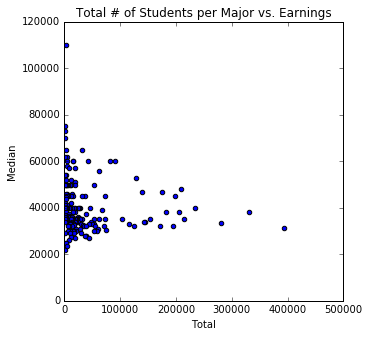

In [4]:
#Association between total number of people with major and earnings:

ax_tot_med = recent_grads.plot(x='Total', y='Median',
             kind='scatter', figsize=(5,5))
ax_tot_med.set_title("Total # of Students per Major vs. Earnings")
ax_tot_med.set_xlim(0,500000)


Our scatterplot demonstrates no strong relationship between total number of students per major and median earnings, as there is no directionality in the clustering of the data points.

Another question: Do students that majored in subjects that were majority female make more money?:

(0, 1.0)

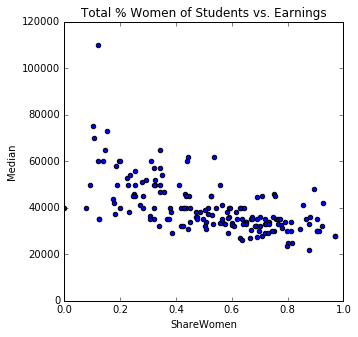

In [5]:
#Association between ShareWomen and Median earnings:

ax_wom_med = recent_grads.plot(x='ShareWomen', y='Median',
             kind='scatter', figsize=(5,5))
ax_wom_med.set_title("Total % Women of Students vs. Earnings")
ax_wom_med.set_xlim(0,1.0)

While not particularly strong, we can see a slight negative trend between earnings and majors that were majority female, such that the higher the percentage of female majors, the lower the median earnings. 

Question 3: Is there any associaton between the number of full-time employees and median salary?:

(0, 300000)

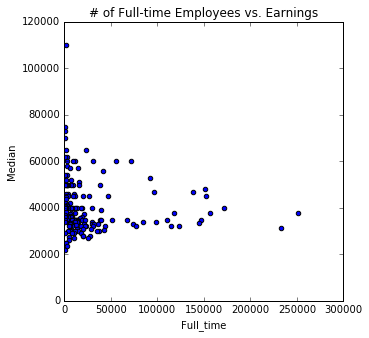

In [6]:
#Association between Full_time and Median earnings:

ax_full_med = recent_grads.plot(x='Full_time', y='Median',
             kind='scatter', figsize=(5,5))
ax_full_med.set_title("# of Full-time Employees vs. Earnings")
ax_full_med.set_xlim(0,300000)

We can clearly see no relationship here between the total number of full-time employees and median earnings.

Let's generate some more scatterplots within one large graph:

(0, 350000)

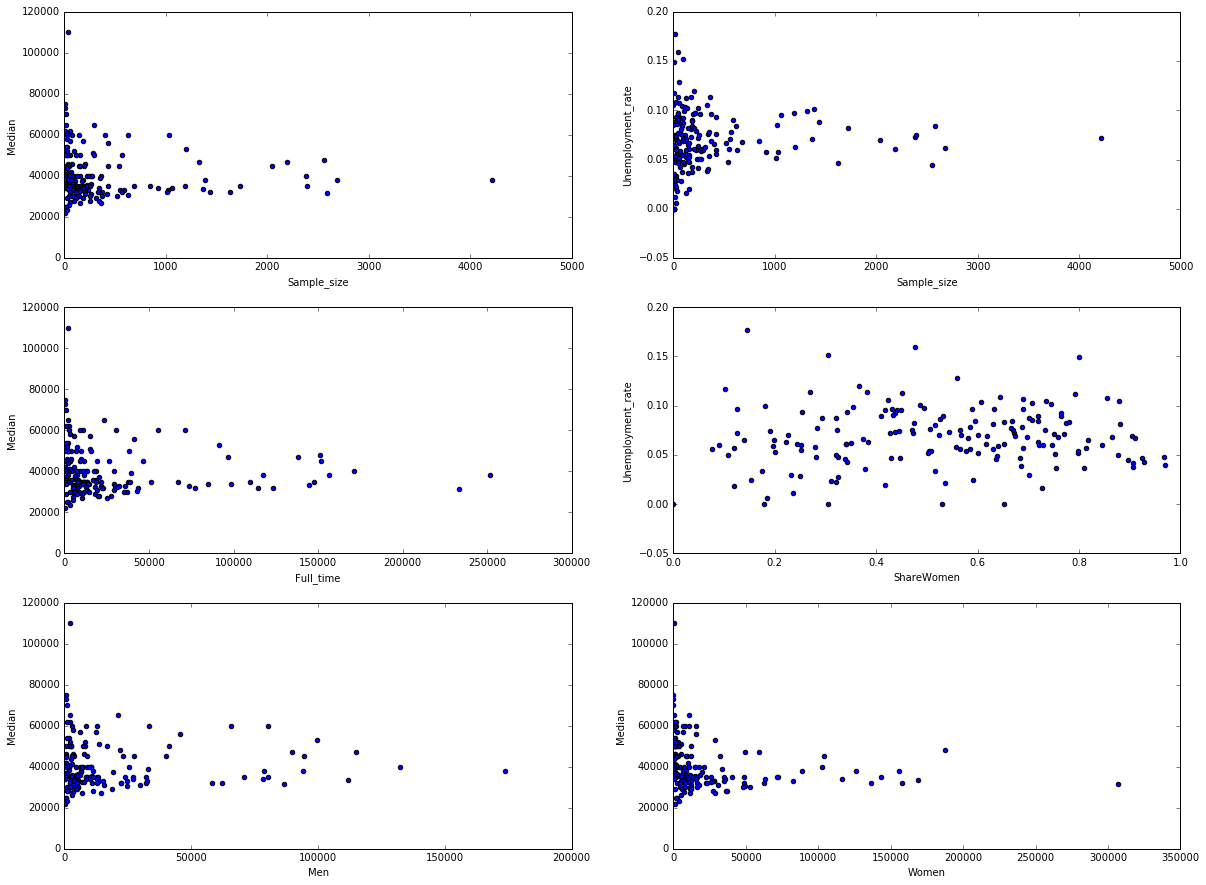

In [7]:
#Scatter Subplots:

fig,axes=plt.subplots(nrows=3,ncols=2,figsize=(20,15))
ax1=recent_grads.plot(ax=axes[0,0],x="Sample_size",y="Median",kind="scatter")
ax1.set_xlim(0,5000)
ax2=recent_grads.plot(ax=axes[0,1],x="Sample_size",y="Unemployment_rate",kind="scatter")
ax2.set_xlim(0,5000)
ax3=recent_grads.plot(ax=axes[1,0],x="Full_time",y="Median",kind="scatter")
ax3.set_xlim(0,300000)
ax4=recent_grads.plot(ax=axes[1,1],x="ShareWomen",y="Unemployment_rate",kind="scatter")
ax4.set_xlim(0,1)
ax5=recent_grads.plot(ax=axes[2,0],x="Men",y="Median",kind="scatter")
ax5.set_xlim(0,200000)
ax6=recent_grads.plot(ax=axes[2,1],x="Women",y="Median",kind="scatter")
ax6.set_xlim(0,350000)

Overall, we can see no strong associations between our paired variables of interest.

*Histograms*

We can also graphically investigate the distribution of scores within variables by generating **histograms**. 

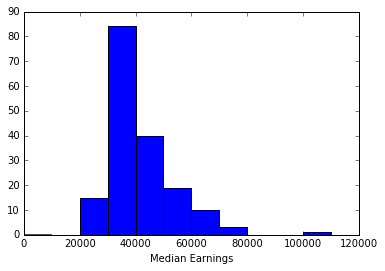

In [8]:
#Histogram: Sample size

h1 = recent_grads['Median'].hist(bins=11, range=(0,110000),
    grid=False)
h1.set_xlabel("Median Earnings")

We can see here that the range of median earnings is between 20,000 and 80,000 with some outliers at less than 10,000 and approximately 110,000. Also, the majority of earnings is between 30-40,000.

Now let's look at the number of employed:

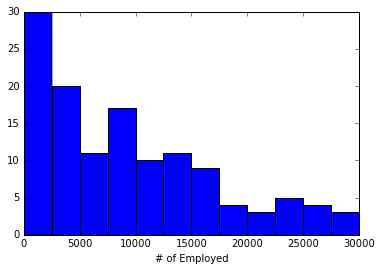

In [42]:
#Histogram: Employed

h1 = recent_grads['Employed'].hist(bins=12, range=(0,30000),
    grid=False)
h1.set_xlabel("# of Employed")

Here we see that 30 majors have 0-2,500 employed respondents. Fewer majors (approx. 3) have 27,500-30,000 employed. A good follow-up question is to investigate what kinds of majors have the highest employed rate.

We can generate more histograms to investigate our variables' distributions, all within one graph:

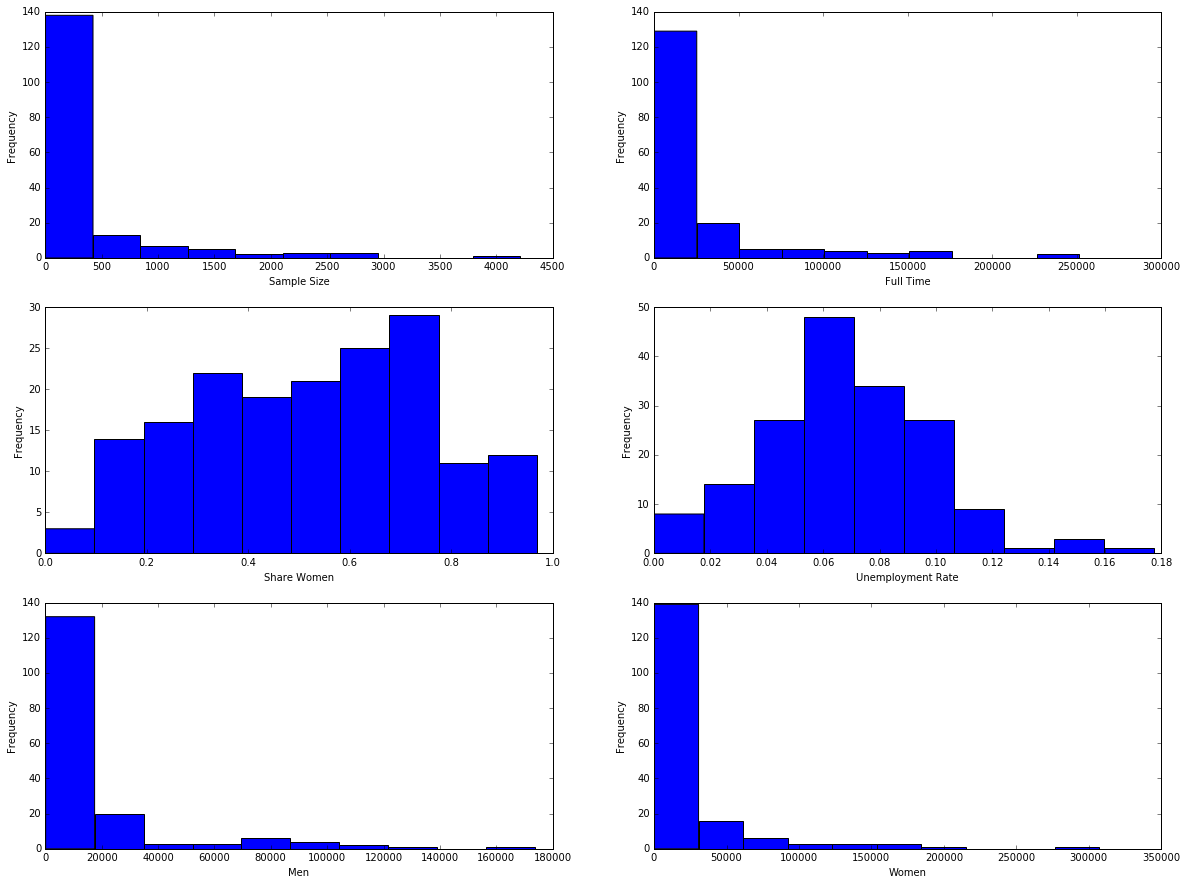

In [9]:
#Histogram Subplots:

fig,axes=plt.subplots(nrows=3,ncols=2,figsize=(20,15))
ax1=recent_grads['Sample_size'].plot(ax=axes[0,0], kind="hist")
ax1.set_xlabel("Sample Size")
ax2=recent_grads['Full_time'].plot(ax=axes[0,1], kind="hist")
ax2.set_xlabel("Full Time")
ax3=recent_grads['ShareWomen'].plot(ax=axes[1,0], kind="hist")
ax3.set_xlabel("Share Women")
ax4=recent_grads['Unemployment_rate'].plot(ax=axes[1,1], kind="hist")
ax4.set_xlabel("Unemployment Rate")
ax5=recent_grads['Men'].plot(ax=axes[2,0], kind="hist")
ax5.set_xlabel("Men")
ax6=recent_grads['Women'].plot(ax=axes[2,1], kind="hist")
ax6.set_xlabel("Women")

*Scatter Matrix Plot*

Rather than generate scatterplots and histograms separately, we could conduct a **scatter matrix plot** which combines both scatterplots and histograms into one grid of plots, and allows us to explore potential relationships and distributions of our variables simultaneously.

Let's try creating a scatter plot matrix for 'Sample_size' and 'Median':

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fcba2d9be10>,
      dtype=object)

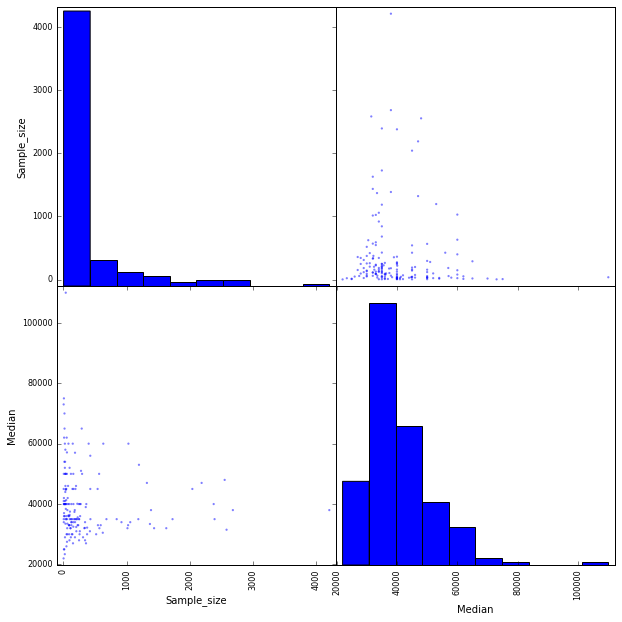

In [63]:
#Scatterplot matrix: Sample size vs. Median

from pandas.plotting import scatter_matrix 
scatter_matrix(recent_grads[['Sample_size', 'Median']], 
    figsize=(10,10))

These graphs are nearly identical to when we generated them on their own (these histograms are binned slightly differently then when we requested the bins specifically). We see no real association between sample size and median earnings.

Here is a 3x3 scatterplot, using 'Sample_size', 'Median', and 'Unemployment_rate':

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe29a087160>,
      dtype=object)

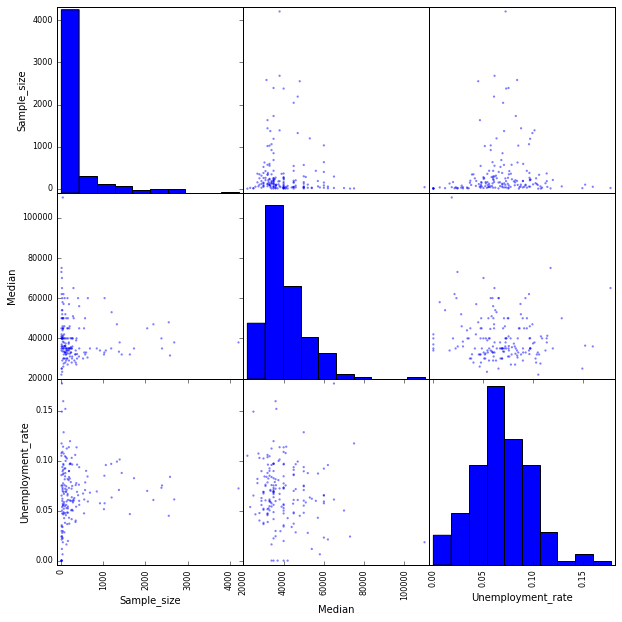

In [10]:
#3x3 Scatterplot matrix: Sample size, Median, Unemployment_rate

from pandas.plotting import scatter_matrix 
scatter_matrix(recent_grads[['Sample_size', 
   'Median', 'Unemployment_rate']], figsize=(10,10))

*Bar Plots*

We can also generate **bar plots** here to get the frequency count of values within our variables.

Let's see how many different kinds of major categories there are in our dataset:

([<matplotlib.axis.XTick at 0x7fe299a2e7b8>,
 <a list of 16 Text xticklabel objects>)

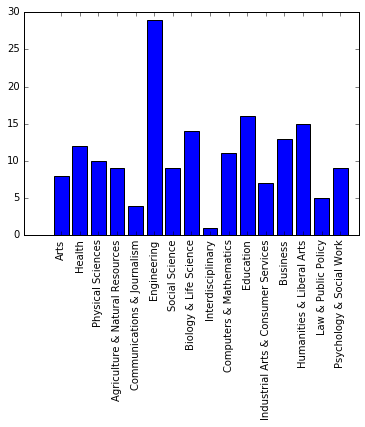

In [11]:
#Bar Plot: Major Categories

majordict = {}
for x in recent_grads['Major_category']:
    if x in majordict:
        majordict[x] += 1
    else:
        majordict[x] = 1

plt.bar(range(len(majordict)), list(majordict.values()), align='center')
plt.xticks(range(len(majordict)), list(majordict.keys()), rotation=90)

Interestingly, we see that the majority of degrees are in engineering.

Now let's compare the unemployment rate by major from the first ten rows and last 10 rows of our 'recent_grads' dataset using bar charts:

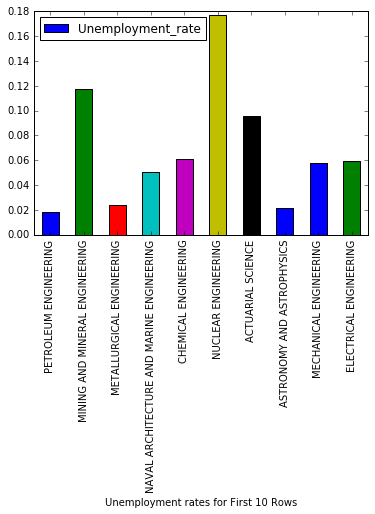

In [12]:
#Unemployment rate for first 10 rows:

b1 = recent_grads.head(10).plot.bar(x="Major",y="Unemployment_rate")
b1.set_xlabel("Unemployment rates for First 10 Rows")


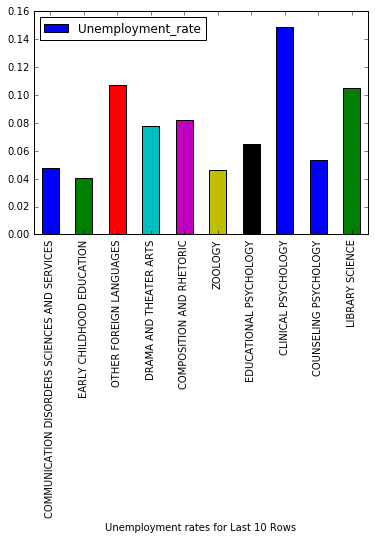

In [13]:
#Unemployment rate for last 10 rows:

b2 = recent_grads.tail(10).plot.bar(x="Major",y="Unemployment_rate")
b2.set_xlabel("Unemployment rates for Last 10 Rows")

Certain kinds of engineering degrees (e.g., nuclear, mining) have higher unemployment rates than others, but overall, engineering is a career with low unemployment rates. The same cannot be said for some of the humanities and social sciences, with foreign languages, library science and clinical psychology demonstrating a higher unemployment rate compared to other majors.

*Box Plots*

We can investigate the distribution within our variables further using **boxplots**. A boxplot can visually demonstrate the middle value of our distribution (i.e., median) as well as the top and bottom 25% of our scores, called quartiles. The region between the 1st and 3rd quartiles comprises the **interquartile range (IQR)**, and is a common measure of dispersion.

Let's generate a boxplot for our median salaries:

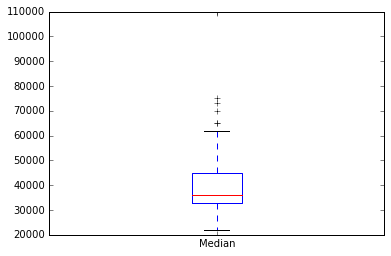

In [18]:
#Boxplot: Median Salaries

bx1 = recent_grads['Median'].plot.box()

The median is approx. 45,000, while our IQR spans between 32,000 and 47,000. We see some outliers in our dataset (i.e., the cross marks that fall outside of our boxplot's range (or whiskers)).

What is our distribution for the unemployment rate?:

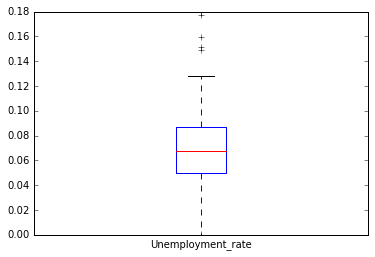

In [20]:
#Box plot: Unexmployment rate

bx2= recent_grads['Unemployment_rate'].plot.box()

We see that the median is approx. 6.5% unemployed, and our IQR spans 4.5-9% unemployed. Again, we see some outliers, with some higher unemployment rates presented (15-18%).

Overall, this is a quick overview of the different types of data visualizations that can be produced using matplotlib. Data visualizations help us better understand our data, even before conducting any kind of statistcal analysis.